
Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 1

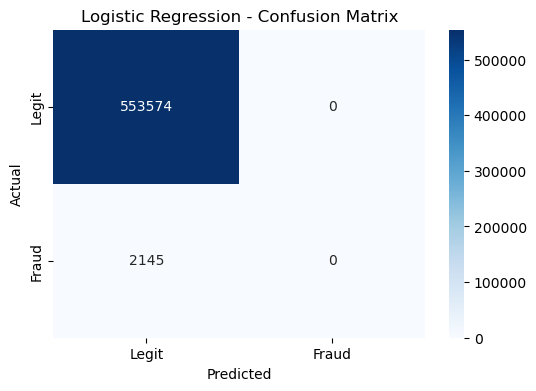

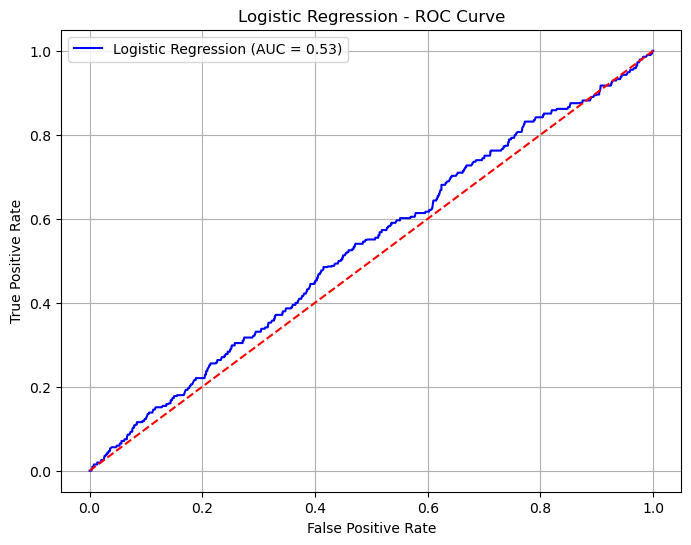


Decision Tree Training:
Accuracy: 0.961
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.05      0.45      0.08      2145

    accuracy                           0.96    555719
   macro avg       0.52      0.71      0.53    555719
weighted avg       0.99      0.96      0.98    555719



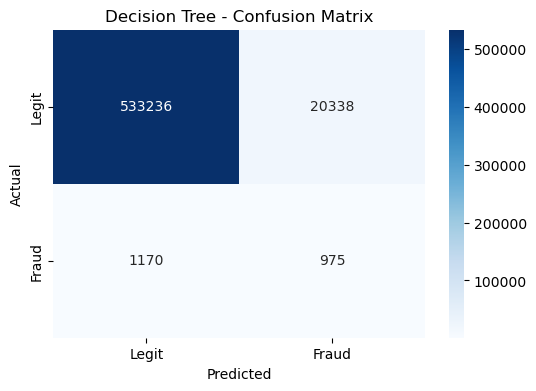

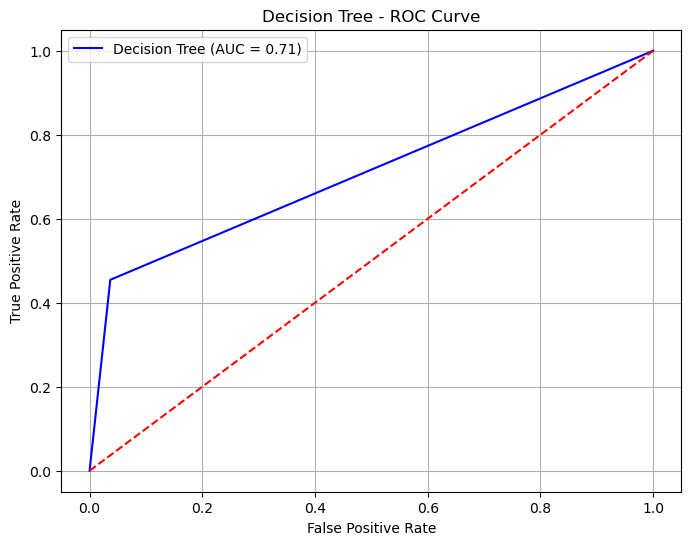


Random Forest Training:
Accuracy: 0.997
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.77      0.47      0.58      2145

    accuracy                           1.00    555719
   macro avg       0.88      0.74      0.79    555719
weighted avg       1.00      1.00      1.00    555719



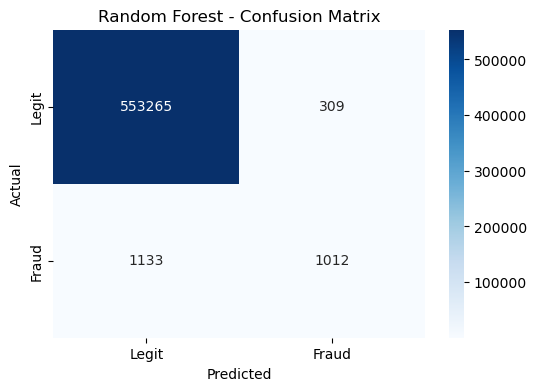

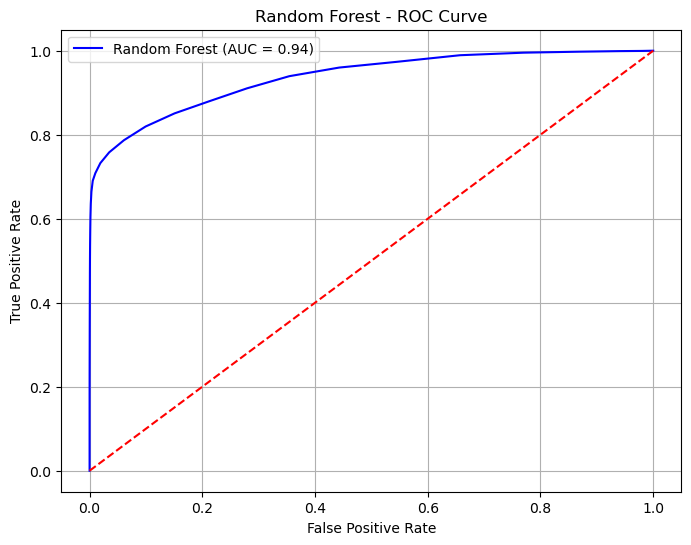

In [1]:
##CREDIT CARD FRAUD DETECTION
#Build a model to detect fraudulent credit card transactions.
#Use a dataset containing information about credit card transactions,
#and experiment with algorithms like Logistic Regression, Decision Trees, or Random Forests
#to classify transactions as fraudulent or legitimate.


# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Load datasets
train_data = pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')

# Analyze datasets
print("\nTraining Data Info:")
print(train_data.info())
print("\nSample Training Data:")
print(train_data.head())

print("\nTesting Data Info:")
print(test_data.info())
print("\nSample Testing Data:")
print(test_data.head())

# Check for missing values
print("\nTraining Data Missing Values:")
print(train_data.isnull().sum())
print("\nTesting Data Missing Values:")
print(test_data.isnull().sum())

# Combine datasets for consistent preprocessing
data = pd.concat([train_data, test_data])
print(data.head())

#Irrelevant Features:trans_date_trans_time, first, last, gender, street, dob, trans_num
#Numeric Features:amt, city_pop, lat, long, merch_lat, merch_long
#Categorical Features:merchant, category, city, state
#Target Feature:is_fraud
#Temporal Data:unix_time
# Drop irrelevant columns
data.drop(
    columns=[
        "trans_date_trans_time",
        "first",
        "last",
        "gender",
        "street",
        "dob",
        "trans_num",
    ],
    inplace=True,
)

# Encode categorical features
le = LabelEncoder()
for col in ["merchant", "category", "city", "state"]:
    data[col] = le.fit_transform(data[col])

# Separate back into training and testing data
train_data = data.iloc[:len(train_data), :]
test_data = data.iloc[len(train_data):, :]

# Separate features and target
X_train = train_data.drop(columns=["is_fraud"])
y_train = train_data["is_fraud"]
X_test = test_data.drop(columns=["is_fraud"])
y_test = test_data["is_fraud"]

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
}

# Handle the 'job' column
if 'job' in data.columns:
    data['job'] = le.fit_transform(data['job'])  # Label encode the 'job' column

# Ensure all features are numeric
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
X_train = X_train[numeric_features]
X_test = X_test[numeric_features]

# Train and evaluate models
for name, model in models.items():
    print(f"\n{name} Training:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.3f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Legit", "Fraud"],
        yticklabels=["Legit", "Fraud"],
    )
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})", color="blue")
    plt.plot([0, 1], [0, 1], linestyle="--", color="red")  # Random guess line
    plt.title(f"{name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

Sample Data:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Class Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


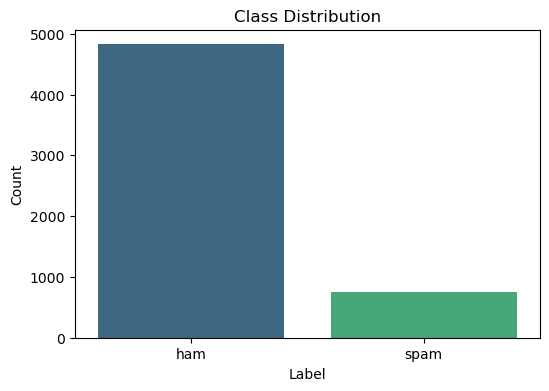

X_train: 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Naive Bayes Training:
Accuracy: 0.974
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1448
           1       0.99      0.81      0.89       224

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672



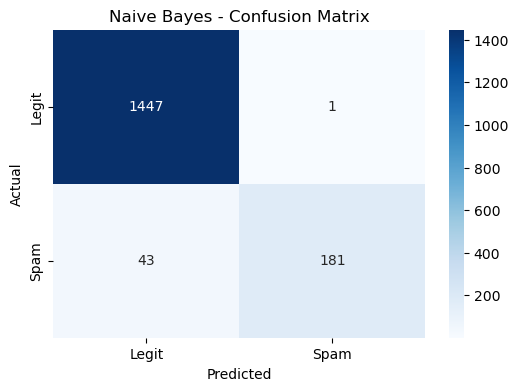

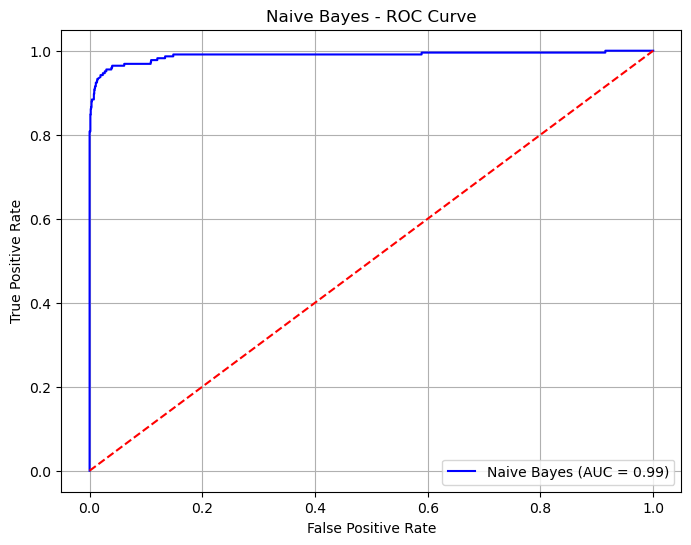


Logistic Regression Training:
Accuracy: 0.958
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1448
           1       0.99      0.69      0.82       224

    accuracy                           0.96      1672
   macro avg       0.97      0.85      0.90      1672
weighted avg       0.96      0.96      0.95      1672



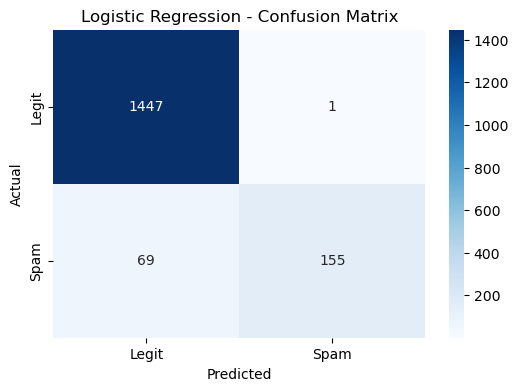

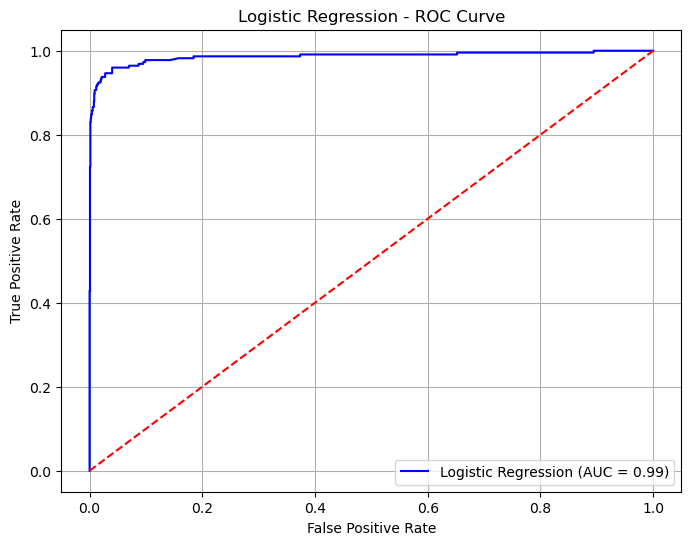


Support Vector Machine Training:
Accuracy: 0.983
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.98      0.89      0.93       224

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



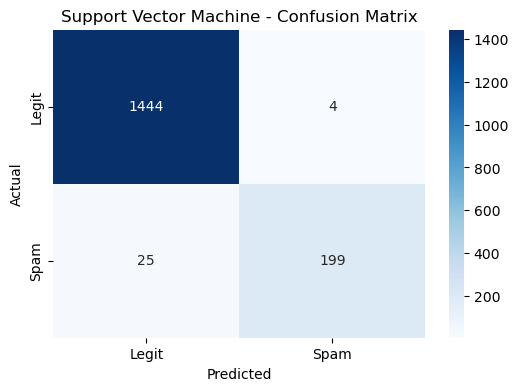

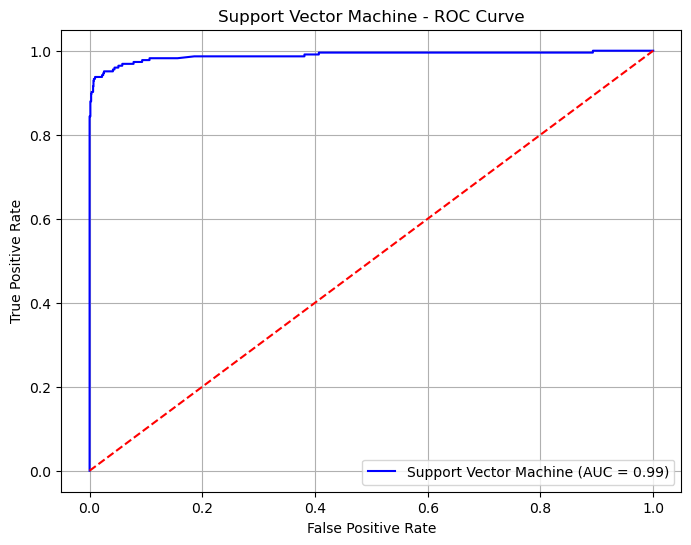

In [2]:
#SPAM SMS DETECTION

#Build an AI model that can classify SMS messages as spam or legitimate.
#Use techniques like TF-IDF or word embeddings with classifiers like
#Naive Bayes, Logistic Regression, or Support Vector

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
dataset = pd.read_csv('spam.csv', encoding='latin-1')  # Adjust file name if different
dataset = dataset.rename(columns={'v1': 'label', 'v2': 'message'})  # Rename columns
dataset = dataset[['label', 'message']]  # Keep only relevant columns

print("Dataset Info:")
print(dataset.info())
print("\nSample Data:")
print(dataset.head())
print("\nClass Distribution:")
print(dataset['label'].value_counts())

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=dataset, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Preprocessing
# Convert labels to binary: spam -> 1, ham -> 0
dataset['label'] = dataset['label'].map({'spam': 1, 'ham': 0})

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(dataset['message']).toarray()
y = dataset['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("X_train: \n")
print(X_train)
# Initialize models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(probability=True, kernel='linear'),
}

# Train and evaluate models
for name, model in models.items():
    print(f"\n{name} Training:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.3f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Legit", "Spam"],
        yticklabels=["Legit", "Spam"],
    )
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve (if probabilities are available)
    if y_proba is not None:
        from sklearn.metrics import roc_curve, auc
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})", color="blue")
        plt.plot([0, 1], [0, 1], linestyle="--", color="red")  # Random guess line
        plt.title(f"{name} - ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.grid()
        plt.show()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None

Sample Data:
   RowNumber  CustomerId   Surname  CreditScore Geography  Ge

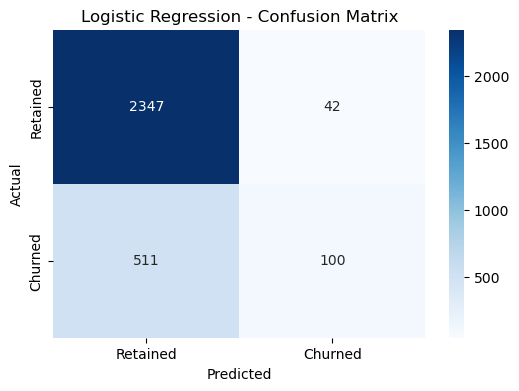


Random Forest Training:
Accuracy: 0.863
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.77      0.47      0.58       611

    accuracy                           0.86      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



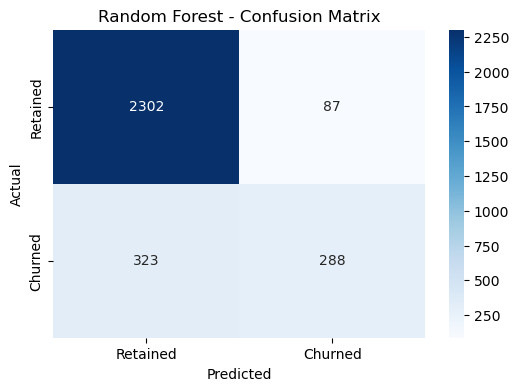


Gradient Boosting Training:
Accuracy: 0.870
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2389
           1       0.80      0.48      0.60       611

    accuracy                           0.87      3000
   macro avg       0.84      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



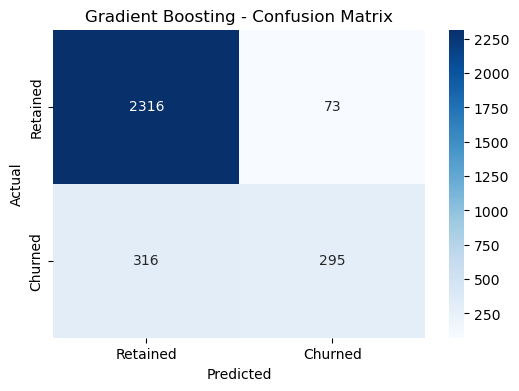

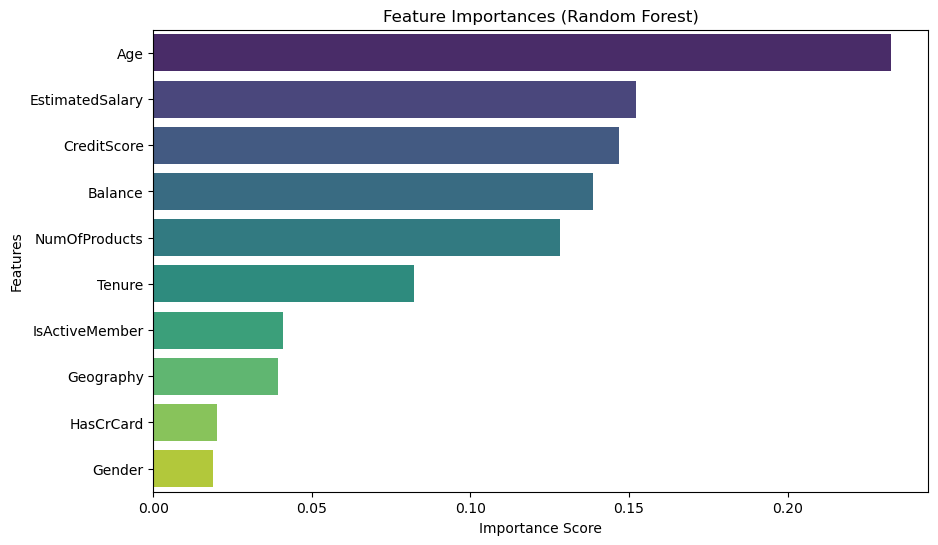

In [3]:
#CUSTOMER CHURN PREDICTION
#Develop a model to predict customer churn for a subscription-based service or business. Use historical customer data, including
#features like usage behavior and customer demographics, and try algorithms like Logistic Regression, Random Forests, or Gradient Boosting to predict churn.

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")


# Load dataset
dataset = pd.read_csv("Churn_Modelling.csv")  # Replace with your dataset path

# Display dataset info
print("Dataset Info:")
print(dataset.info())
print("\nSample Data:")
print(dataset.head())

# Drop irrelevant columns
dataset = dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical features
label_encoder = LabelEncoder()
dataset['Geography'] = label_encoder.fit_transform(dataset['Geography'])
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

# Separate features and target
X = dataset.drop('Exited', axis=1)
y = dataset['Exited']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=100),
}

# Train and evaluate models
for name, model in models.items():
    print(f"\n{name} Training:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.3f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Retained', 'Churned'], yticklabels=['Retained', 'Churned'])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Visualize feature importance (Random Forest)
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
